In [1]:
import os, platform, sys, h5py
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox, FloatRangeSlider

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append("/Users/gkoolstra/Documents/Code")
    from BEMHelper import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis
from TrapAnalysis import artificial_anneal as anneal
from mpltools import color

%matplotlib inline
%config InlineBackend.figure_format='retina'

Could not import BEM module. Please do so manually.


In [11]:
datapath = r"/Users/gkoolstra/Desktop/kinetic_inductance.h5"

temperature = list()

with h5py.File(datapath, "r") as f:
    k = 0
    for stack in f.keys():
        if "stack" in stack:
            temperature.append(f[stack + "/temperature"][()])
            fpoints = f[stack + "/fpoints"][()]
            mags = f[stack + "/mags"][()]

            if k == 0:
                F = fpoints
                M = mags
            else:
                F = np.vstack((F, fpoints))
                M = np.vstack((M, mags))

            k += 1

In [20]:
f0s = list()

for k in range(np.shape(M)[0]):
    T = temperature[k]
    f0, alpha, Tc = 4205794676.5043077, 0.0035200412698998696, 1.4748338095619047
    center = f0 * (1 + alpha / (1 - (T / Tc) ** 4)) ** (-1 / 2.)
    span = 3E6
    try:
        fr, ferr = kfit.fit_lor(F[k,:], M[k,:], domain=(center[0]-span/2., center[0]+span/2.), verbose=False)
    except:
        fr, ferr = kfit.fit_lor(F[k,:], M[k,:], verbose=False)
        print('error')
    f0s.append(fr[2])

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


(0.024094899999999999, 2.2019600000000001)

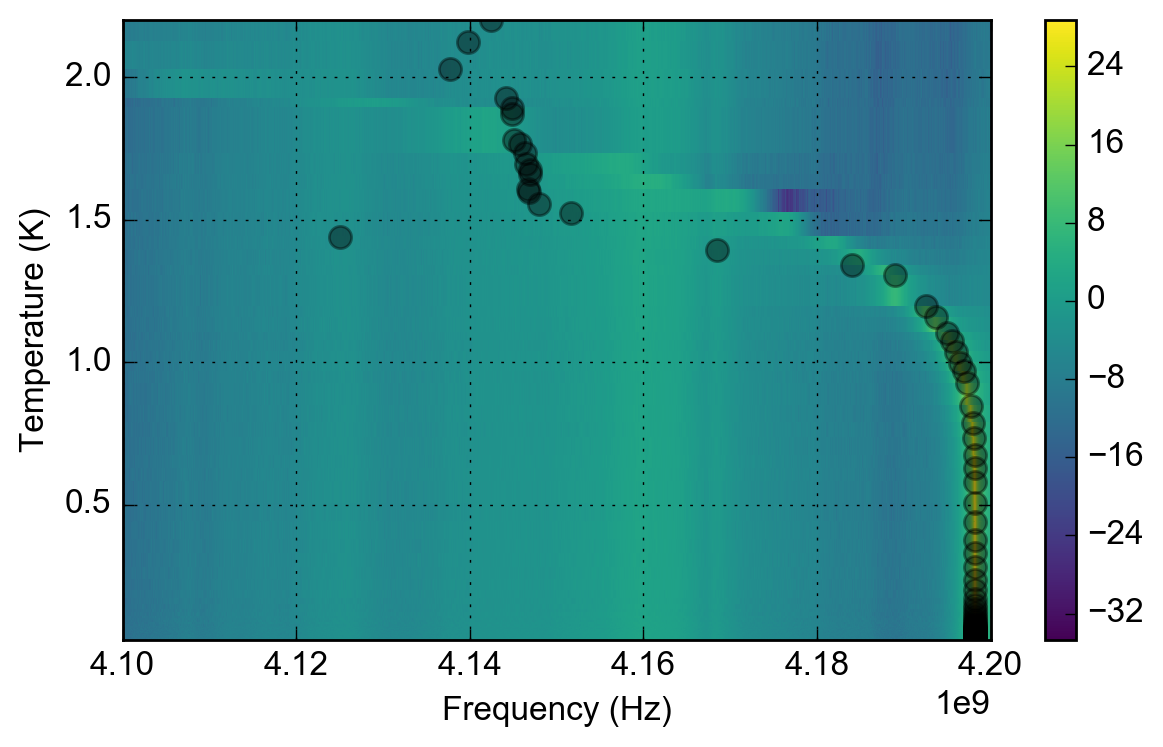

In [23]:
plt.figure(figsize=(7.,4))
common.configure_axes(12)
plt.pcolormesh(F, temperature, M, cmap=plt.cm.viridis)
plt.plot(f0s, temperature, 'o', **common.plot_opt("black"))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Temperature (K)")
plt.colorbar()
plt.grid()
plt.xlim(np.min(F), np.max(F))
plt.ylim(np.min(temperature), np.max(temperature))

===========================  =====================  ======================
Parameter                            Value                   Std
===========================  =====================  ======================
f0                             4203852145.375702      282666.69658287935
Kinetic Inductance fraction  0.0026847347841855284  0.00011240200789179616
Tc                             1.455261669922948     0.00260469159974555
===========================  =====================  ======================


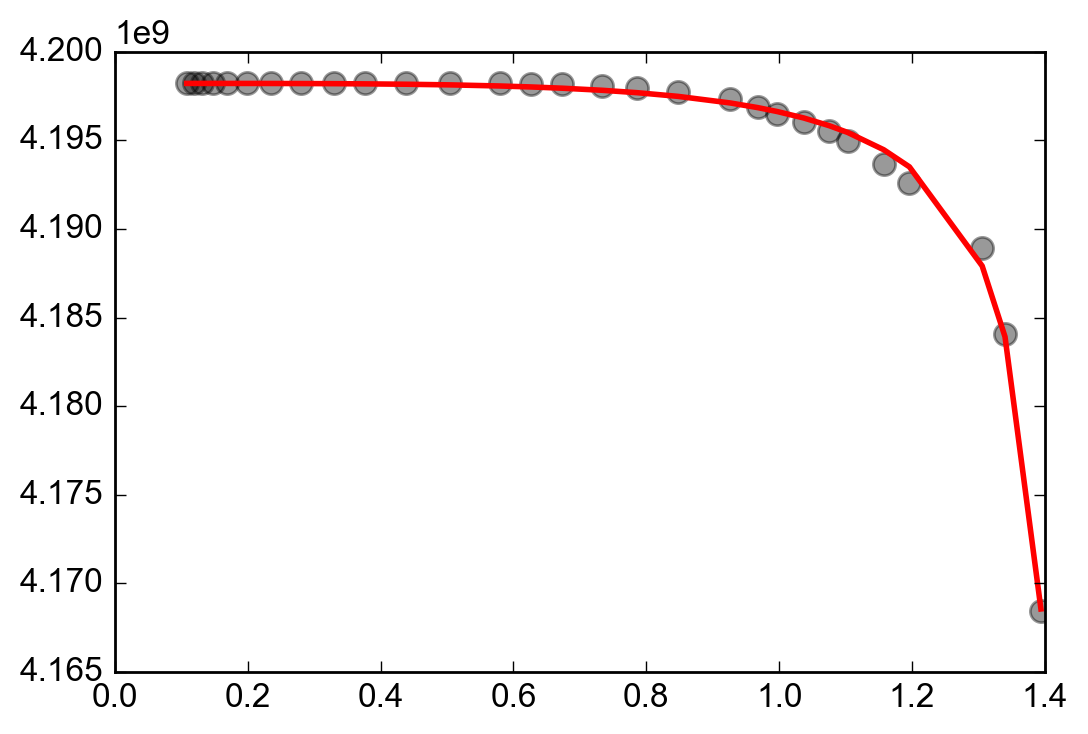

In [22]:
mask = np.where(np.logical_and(np.array(temperature) < 1.4, np.array(temperature) > 0.10))[0]
f0_for_fit = np.array(f0s)[mask]
t_for_fit = np.array(temperature)[mask]

plt.figure()
common.configure_axes(12)
plt.plot(t_for_fit, f0_for_fit, 'o', **common.plot_opt('black'))

f0_guess = 4.21E9
alpha_guess = 0.10
Tc_guess = 4.0

fr, ferr = kfit.fit_kinetic_fraction(t_for_fit, f0_for_fit, fitparams=[f0_guess, alpha_guess, Tc_guess], 
                                     showfit=False, parambounds=[[0, 0, 0], [np.inf, np.inf, np.inf]])

plt.plot(t_for_fit, kfit.kinfunc(t_for_fit, *fr), '-r', lw=2.0)

(0.024094899999999999, 2.2019600000000001)

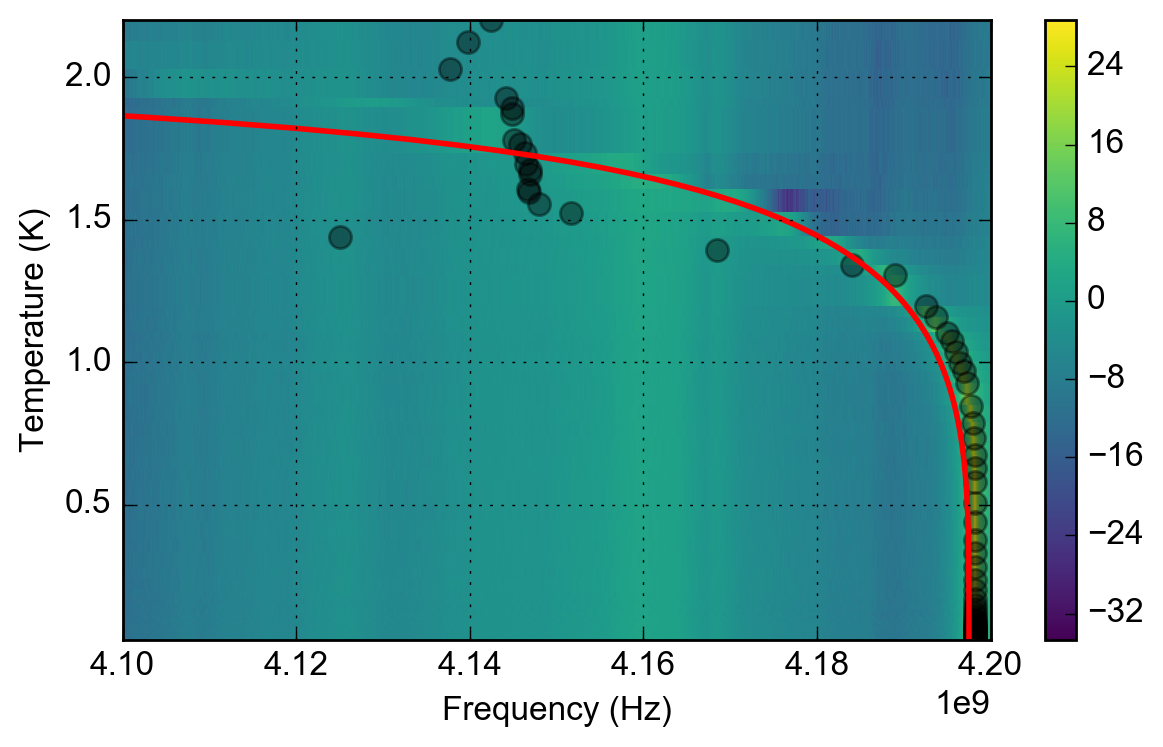

In [72]:
plt.figure(figsize=(7.,4))
common.configure_axes(12)
plt.pcolormesh(F, temperature, M, cmap=plt.cm.viridis)
plt.plot(f0s, temperature, 'o', **common.plot_opt("black"))
plt.plot(kfit.kinfunc(np.linspace(2.0, 20E-3, 101), *[4.26E9, 0.03, 2.1]), np.linspace(2.0, 20E-3, 101), '-r', lw=2.0)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Temperature (K)")
plt.colorbar()
plt.grid()
plt.xlim(np.min(F), np.max(F))
plt.ylim(np.min(temperature), np.max(temperature))

In [6]:
def kinfunc_jac(x, *p):
    f0, alpha, Tc = p
    a = 1 - (x/Tc)**4
    b = (1 + alpha/a)**(-3/2.)

    #[f0, alpha, Tc]

    df_dalpha = -f0*b/(2*a)
    df_dTc = 2 * b * f0 * x**4 * alpha / (a**2 * Tc**5)
    df_df0 = b**(1/3.)

    print(np.shape(np.hstack([df_df0, df_dalpha, df_dTc])))

    return np.hstack([df_df0, df_dalpha, df_dTc])

In [7]:
kfit.kinfunc(t_for_fit, *[f0_guess, alpha_guess, Tc_guess]).flatten()

array([  4.01260786e+09,   4.01278982e+09,   4.01301600e+09,
         4.01311967e+09,   4.01324974e+09,   4.01336982e+09,
         4.01344983e+09,   4.01355125e+09,   4.01370875e+09,
         4.01380440e+09,   4.01387041e+09,   4.01393052e+09,
         4.01396762e+09,   4.01399715e+09,   4.01403109e+09,
         4.01405111e+09,   4.01406320e+09,   4.01406912e+09,
         4.01407312e+09,   4.01407533e+09,   4.01407638e+09,
         4.01407691e+09,   4.01407716e+09,   4.01407729e+09,
         4.01407736e+09,   4.01407740e+09])